In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded=files.upload()

Saving advertising.csv to advertising.csv


In [3]:
df=pd.read_csv("advertising.csv")

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.describe() #기초통계량

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
import statsmodels.api as sm

In [9]:
X=df[["TV", "Radio", "Newspaper"]]

In [10]:
y=df["Sales"]

In [11]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
X_sm=sm.add_constant(X)

In [13]:
X_sm.head()

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


In [14]:
lr=sm.OLS(y, X_sm).fit()

In [16]:
print(lr.summary()) #P>[t]는 P-value / r-squered은 설명력을 뜻하지만 신뢰도있지는 않음..^^

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           8.13e-99
Time:                        03:24:19   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [17]:
y_pred=lr.predict(X_sm)

In [19]:
y_pred #각각의 값에서 예측한 prediction

0      21.220972
1      11.268248
2      10.496209
3      17.312447
4      15.644137
         ...    
195     7.105490
196    10.280941
197    15.259287
198    24.582220
199    18.185120
Length: 200, dtype: float64

In [20]:
residual=y-y_pred

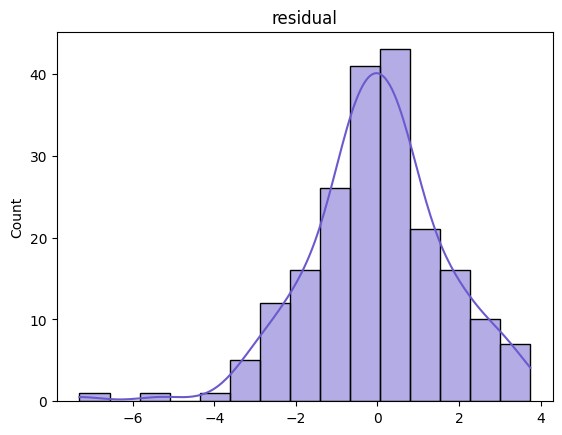

In [27]:
sns.histplot(residual, bins=15, kde=True, color="slateblue")
plt.title("residual")
plt.show() #정규분포의 모양을 따른다고 볼 수 잇음

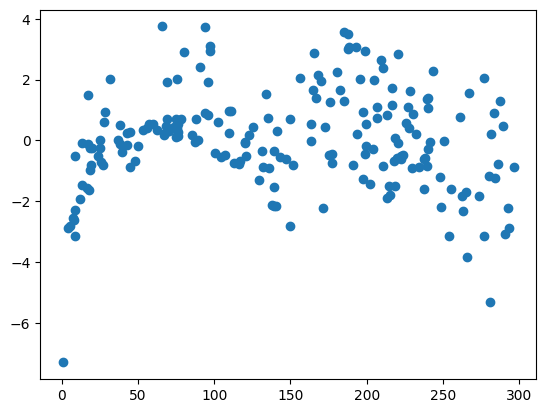

In [28]:
plt.scatter(df["TV"], residual)
plt.show()

# T-test (t-검정) 단일 표본 검정(one sample t-test)

- 단일 모집단에서 연속형 변수의 평균값을 특정 기준값과 비교하고자 할 때

  - 단일 표본 $t$ 검정은 하나로 구성된 모집단의 평균($μ$) 값을 기준값과 비교하고자 할 때 사용되는 분석법

**기본 가정**
1. 정규성

  - 독립변수에 따른 종속 변수는 정규분포를 만족해야 함
  - 정규성 검정이 선행되어야 함

  **정규성을 확인하는 방법**
  1. QQ plot
  2. Shapiro-test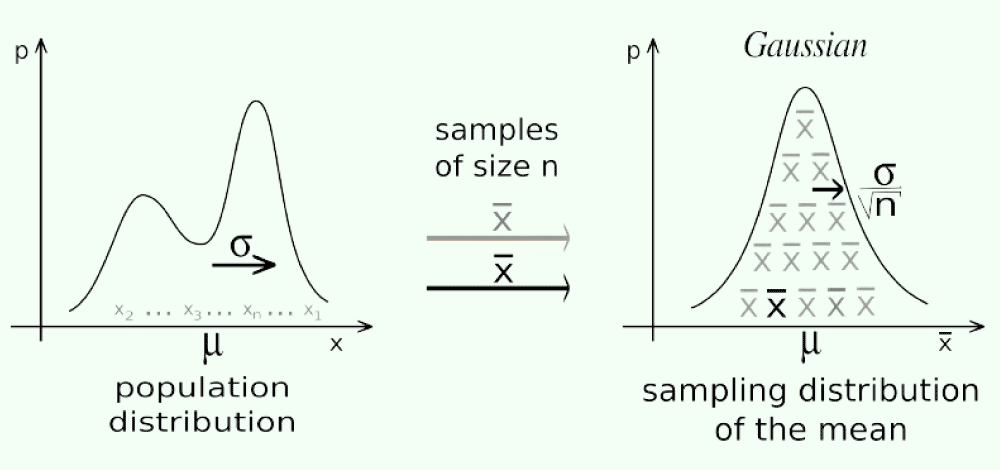



In [29]:
from scipy.stats import stats

In [30]:
import scipy as sp

In [32]:
norm_sample=np.random.normal(0,10,1000) #평균 0,variace 10, 1000개

In [35]:
norm_sample

array([-2.58284662e+01, -1.27866184e+01, -1.19399272e+01,  1.34603935e+01,
       -4.56677970e-01, -2.03822508e+00, -1.26858749e+00,  1.30198956e+00,
        1.98308759e+01, -1.47985660e+00, -1.58473772e+01,  6.46056150e+00,
        2.78932767e+00, -9.80350659e+00, -2.57622818e+00, -3.46871223e+00,
        7.13992691e+00,  1.04252486e+01,  5.83540239e+00,  2.26668003e+01,
       -1.20187899e+01, -4.89529343e+00, -9.93965014e+00, -5.89443696e+00,
       -1.20721833e+01,  1.11333999e+01,  1.03529611e+01,  2.49147342e+00,
        1.96627542e+01,  1.60160836e+01,  1.08874527e+01, -4.10409096e+00,
        8.67813077e+00,  1.02434430e+01, -2.18114186e+00, -1.27170709e+01,
       -6.03539564e+00,  8.01508049e+00, -1.72327814e+01,  5.30638260e+00,
       -1.72896541e+00,  6.93921498e-01, -1.21738994e+01, -1.04862612e+01,
        4.89096250e+00,  9.87341280e+00,  2.65624948e+01, -1.18750395e+00,
        1.12187930e+01, -9.26514430e+00, -1.20937157e+01, -1.15740356e+01,
        1.00801135e+01,  

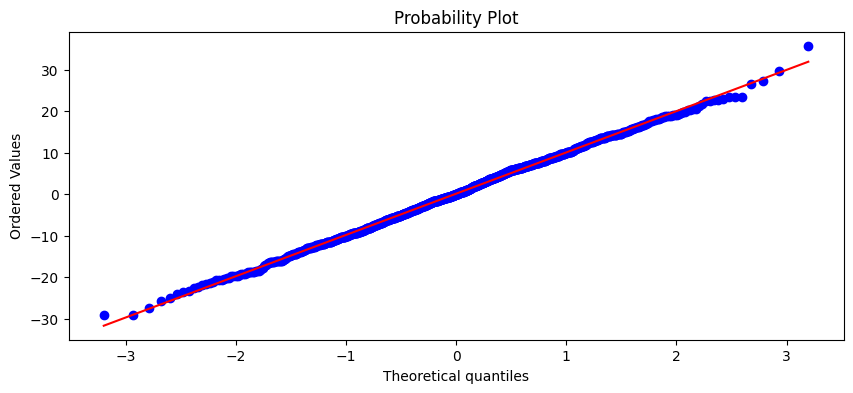

In [36]:
fig, ax=plt.subplots(figsize=(10,4))
sp.stats.probplot(norm_sample, plot=ax) #빨간선위에 잘 있으면 normal : 정규성을 만족한다~~
plt.show()

- Shapiro Test
  - 귀무가설 : 해당 데이터가 정규성을 충족한다
    - 귀무가설을 accept하기 위해서는 (정규성을 만족하기 위해서:영향력은 0이다) p-value > 0.05

      **cf. 귀무가설 reject하려면 p-value < 0.05 : 영향력이 있다.**

    - scipt.stats 모듈 사용



In [38]:
from scipy.stats import shapiro

In [40]:
np.random.seed(0)
n=1000
x1=np.random.normal(0,10,n)
shapiro_test=shapiro(x1)

In [42]:
shapiro_test #p-value>0.05 --> accet한다!

ShapiroResult(statistic=0.9985560774803162, pvalue=0.5916484594345093)

 p-value 값이 0.05보다 크기 때문에, 해당 데이터는 정규성을 충족한다.

### example

  - 과수원에서 배를 생산함
  - 일반적으로 과수원에서 생산한 배의 무게는 200g
  - 실제로 과수원에서 생산한 배의 무게도 200g인지를 확인하기 위해 생산된 배 15개를 임의로 뽑아서 무게를 측정하고자 함

  - 귀무가설 $H_0$ : $\mu=200$
  - 대립가설 $H_A$ : $\mu\neq 200$
  

In [43]:
mu=200
pear=[200,210,180,190,185,170,180,180,210,180,183,191,204,201,187]

In [46]:
shapiro(pear) #p-value >0.05 -->accept

ShapiroResult(statistic=0.9248351454734802, pvalue=0.2281571328639984)

In [47]:
from scipy import stats

In [50]:
pear_ttest=stats.ttest_1samp(pear, 200) #200은 귀무가설!

In [49]:
pear_ttest

TtestResult(statistic=-3.1404979981824845, pvalue=0.00722684576077687, df=14)

-  p-value : 0.0070
  - 귀무가설을 reject(기각)
  - 결과 : 배의 평균 무게는 200g이라고 할 수 없음
  


# 예제 2

- 게의 체온이 24.3${^\circ}$C 라고 할 수 있는 지를 검정하기


In [51]:
from google.colab import files

In [52]:
uploaded = files.upload()

Saving crab.csv to crab.csv


In [57]:
crab=pd.read_csv("crab.csv")

In [58]:
crab.head()

,crab
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1


- 귀무가설 $H_0 : \mu=24.3$

In [63]:
shapiro(crab) #정규성

ShapiroResult(statistic=0.9761896729469299, pvalue=0.8007838726043701)

In [60]:
crab_ttest=stats.ttest_1samp(crab,24.3)

In [65]:
crab_ttest #p-value<0.05 : reject (통계적으로 유의미하지 않다)

TtestResult(statistic=array([2.7127693]), pvalue=array([0.01214554]), df=array([24]))

In [66]:
uploaded = files.upload()

Saving NetflixOriginals.csv to NetflixOriginals.csv


In [68]:
netflix=pd.read_csv("NetflixOriginals.csv", encoding_errors="ignore")

In [69]:
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


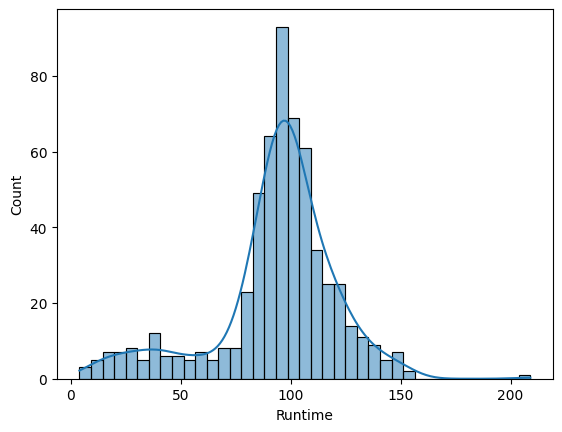

In [71]:
sns.histplot(netflix["Runtime"], kde=True)
plt.show()

In [72]:
netflix.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [73]:
np.mean(netflix["Runtime"])

93.57705479452055

- one sample t-test
- $H_0$ :$\mu = 91.3$

In [74]:
netflix_ttest1=stats.ttest_1samp(netflix["Runtime"],91.3)

In [76]:
netflix_ttest1 #런타임의 p-value < 0.05 --> reject

TtestResult(statistic=1.9821390465346165, pvalue=0.04793278487063802, df=583)

-  $H_0$ :$\mu = 93.0$

In [77]:
netflix_ttest2=stats.ttest_1samp(netflix["Runtime"], 93.0)

In [79]:
netflix_ttest2 #p-value>0.05 --> accept

TtestResult(statistic=0.5023167834878675, pvalue=0.6156343750882074, df=583)

# CLT : central limit theoram (여기까지 시험범위)
- 모집단이 (평균이 $\mu$이고 표준편차가 $\sigma$인 임의의 분포)를 이룬다고 할 때, 이 모집단으로 부터 추출된 표본이 충분히 크다면 (표본의 크기 $n$이 충분히 크다)면 표본 평균들이 이루는 분포는 평균이 $\mu$이고 표준편차가 $\frac{\sigma}{\sqrt{n}}$





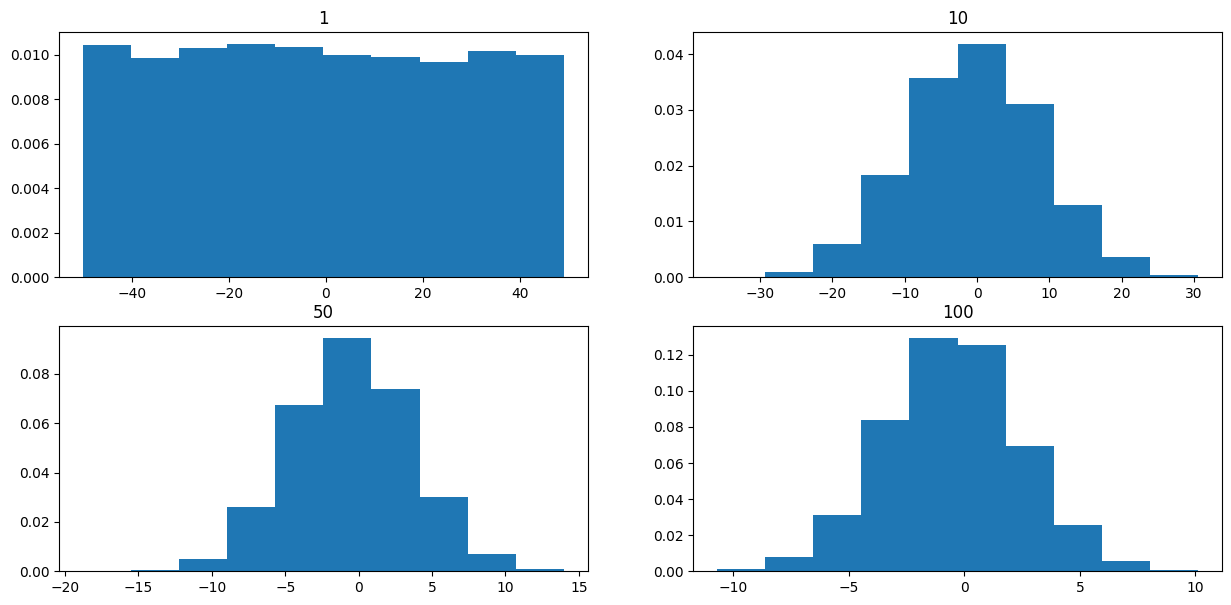

In [98]:
#그냥 설명용. 몰라도 됨 . 써보는 데 의의를 둠

num=[1,10,50,100]
means=[] #xbar를 쌓겠다는 의도였음.
for j in num:
  np.random.seed(0)
  x=[np.mean(np.random.randint(-50,50,j)) for _i in range(10000)]

  means.append(x)

k=0
fig, ax=plt.subplots(2, 2, figsize=(15, 7))

for i in range(0,2):
  for j in range(0, 2):
    ax[i,j].hist(means[k], 10, density=True)
    ax[i,j].set_title(label=num[k])
    k+=1

plt.show() #1번, 10번, 50번, 100번 뽑아냈을 때랑 달라진다~는 걸 알아야함 ex) -50부터 50까지 10개를 뽑아서 평균을 한번 내고 그걸 10000번 돌린게 이 아래 그래프
#그냥 10000번하는건 무의미함. 차라리 애초에 500명을 뽑고 조금만 돌려보는 게 더 나을 것

상단의 그래프를 통해서 sample size가 1부터 100까지 증가할수록 히스토그램이 정규분포를 따르고 있음을 확인할 수 있음

In [91]:
np.random.randint(-50, 50, 10)

array([-13, -20, -39,  36,  49, -29,  46,  39,  15,  12])

In [90]:
means=[]
[np.mean(np.random.randint(-50, 50, 10)) for _i in range(30)]

[-2.7,
 3.9,
 4.5,
 -0.9,
 -1.8,
 1.7,
 -1.7,
 5.8,
 5.5,
 16.7,
 8.7,
 2.6,
 9.1,
 8.7,
 11.9,
 6.4,
 -12.4,
 3.6,
 -6.0,
 -0.8,
 3.6,
 0.3,
 1.7,
 -5.0,
 2.3,
 1.4,
 -14.6,
 6.3,
 -20.5,
 -6.2]

시험범위는 조금 중첩될 수 있다~!!! 실습하면서 조금씩 옜날거 불러온거확인